## Baseline solution

In [1]:
# this turns on the autotimer, so that every cell has a timing information below
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.7 MB/s eta 0:00:00
time: 407 µs (started: 2023-04-15 18:47:40 +00:00)


In [2]:
!pip install cdt seaborn==0.12.0 tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.1/921.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7408 sha256=19a7d18ac295260f124d10f77edb240092f528c04e61e18d5a5ffe9e9b95e6cb
  Stored in directory: /root/.cache/pip/wheels/2b/b5/24/fbb56595c286984f7315ee31821d6121e1b9828436021a88b3
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29269 sha256=e7be6cc1c47529c92adec56705a43c1eae3c0b05a38349d0a3c443d767bfc98d
  Stored in directory: /root/.cache/pip/wheels/f3/a1/a2/a4a90339e8fe767416385d9aabc02ab731fa14d55ce7694a33
Successfully built GPUtil skrebate
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from cdt.causality.pairwise import ANM, CDS
from tqdm.notebook import tqdm
tqdm.pandas()

Detecting 1 CUDA device(s).


time: 6.18 s (started: 2023-04-15 18:47:47 +00:00)


In [4]:
!rm -rf starting_kit*

time: 127 ms (started: 2023-04-15 18:47:53 +00:00)


In [6]:
!wget -O public_data.zip https://www.codabench.org/datasets/download/aafd38ea-cb96-47b6-be2e-e0fbacbb2bcb/

--2023-04-15 18:47:57--  https://www.codabench.org/datasets/download/aafd38ea-cb96-47b6-be2e-e0fbacbb2bcb/
Resolving www.codabench.org (www.codabench.org)... 129.175.22.233
Connecting to www.codabench.org (www.codabench.org)|129.175.22.233|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://miniodis-rproxy.lisn.upsaclay.fr/coda-v2-prod-private/dataset/2023-03-05-1678032644/7e70a7261e3c/public_data.zip?AWSAccessKeyId=EASNOMJFX9QFW4QIY4SL&Signature=NkX0qVsp5wkmuRPY1oD3rl5iXqg%3D&Expires=1681670877 [following]
--2023-04-15 18:47:57--  https://miniodis-rproxy.lisn.upsaclay.fr/coda-v2-prod-private/dataset/2023-03-05-1678032644/7e70a7261e3c/public_data.zip?AWSAccessKeyId=EASNOMJFX9QFW4QIY4SL&Signature=NkX0qVsp5wkmuRPY1oD3rl5iXqg%3D&Expires=1681670877
Resolving miniodis-rproxy.lisn.upsaclay.fr (miniodis-rproxy.lisn.upsaclay.fr)... 129.175.8.8
Connecting to miniodis-rproxy.lisn.upsaclay.fr (miniodis-rproxy.lisn.upsaclay.fr)|129.175.8.8|:443... connected.
HTTP

Here is a very simple and intuitive example of causal estimation. Here, the data is generated using a polynomial function, with a random noise added to it. The ANM is able to recover the causal direction of the relationship between X and Y.

In [7]:
!unzip public_data.zip

Archive:  public_data.zip
   creating: public_data/
   creating: public_data/train_set/
  inflating: public_data/train_set/X_train_info.csv  
  inflating: public_data/train_set/y_train.csv  
  inflating: public_data/train_set/X_train.csv  
  inflating: public_data/README.txt  
 extracting: public_data/test_set.zip  
   creating: public_data/valid_set/
  inflating: public_data/valid_set/X_valid_info.csv  
  inflating: public_data/valid_set/X_valid.csv  
time: 2.08 s (started: 2023-04-15 18:48:02 +00:00)


In [8]:
data_path = 'public_data/train_set/X_train.csv'
target_path = 'public_data/train_set/y_train.csv'

time: 394 µs (started: 2023-04-15 18:48:04 +00:00)


In [9]:
# Load the validation data
X_train = pd.read_csv(data_path, index_col=0)
X_train

,A,B
SampleID,,
train1,-6348 4599 -9340 -13170 8456 -10079 -68 7957 ...,6 7 6 7 7 7 7 7 1 7 7 7 1 7 7 7 7 3 3 7 7 7 6...
train2,-6462 7666 19406 -2299 -22045 -6262 24734 -88...,3 4 5 5 5 4 3 7 4 5 5 4 1 5 4 4 5 4 5 5 5 5 5...
train3,12800 -6791 -539 -9092 9818 1646 13806 324 -6...,-7469 38799 -6292 2224 -11357 -10823 -8578 -5...
train4,14 580 -6627 10738 13938 -13793 -17467 -1269 ...,11883 -82 -3086 3150 -7775 -5290 1338 8765 52...
train5,1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1...
...,...,...
train4046,4357 5081 8462 -2377 -12335 -9462 -8831 -1333...,-2732 -4691 8332 7864 6218 -7947 -8314 13878 ...
train4047,-2907 9751 14806 2 -17031 -399 11194 -10194 -...,1804 12086 -1686 10098 -8410 -7808 -6720 -289...
train4048,1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0...,0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0...


time: 774 ms (started: 2023-04-15 18:48:04 +00:00)


In [10]:
y_train = pd.read_csv(target_path, index_col=0)
y_train

,Target
SampleID,
train1,0
train2,1
train3,1
train4,1
train5,0
...,...
train4046,0
train4047,0
train4048,0


time: 14.2 ms (started: 2023-04-15 18:48:05 +00:00)


In [11]:
valid_data_path = 'public_data/valid_set/X_valid.csv'
X_valid = pd.read_csv(valid_data_path, index_col=0)
X_valid

,A,B
SampleID,,
valid1,19226 7619 -2173 5413 6894 3269 -19328 -15435...,187 3407 4666 -3868 7323 -4112 8857 -530 -809...
valid2,-10169 605 5991 -10169 -10169 11379 5991 -101...,-25205 5062 -5027 -5027 5062 -2505 2540 15151...
valid3,3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 4 3 3 2 2 4 3...,1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1...
valid4,0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0...,0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1...
valid5,-9425 -9512 -8549 -6246 -3769 -1905 -8078 252...,1 10 7 1 11 14 14 10 10 9 11 1 14 10 1 8 2 14...
...,...,...
valid4046,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,19353 -25221 16802 2789 7031 7061 -9638 -1200...
valid4047,-8711 -610 6343 4252 -3329 1036 4899 6145 596...,-3313 -3313 69 -3313 -13458 69 -10076 13595 -...
valid4048,-5516 15092 -5516 4788 -5516 -5516 -5516 -551...,15 21 21 21 21 3 8 21 21 21 2 22 21 18 9 14 2...


time: 772 ms (started: 2023-04-15 18:48:05 +00:00)


In [12]:
X_train.describe()

,A,B
count,4050,4050
unique,4050,4050
top,-6348 4599 -9340 -13170 8456 -10079 -68 7957 ...,6 7 6 7 7 7 7 7 1 7 7 7 1 7 7 7 7 3 3 7 7 7 6...
freq,1,1


time: 70.2 ms (started: 2023-04-15 18:48:06 +00:00)


The data is a list of pairs. Right now the data points are stored as strings, so we need to convert them to a list of numbers.

In [13]:
convert = lambda x: np.array([float(i) for i in x.split(' ')[1:]])
X_train["A"] = X_train["A"].apply(convert)
X_train["B"] = X_train["B"].apply(convert)
X_train

,A,B
SampleID,,
train1,"[-6348.0, 4599.0, -9340.0, -13170.0, 8456.0, -...","[6.0, 7.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 1.0, ..."
train2,"[-6462.0, 7666.0, 19406.0, -2299.0, -22045.0, ...","[3.0, 4.0, 5.0, 5.0, 5.0, 4.0, 3.0, 7.0, 4.0, ..."
train3,"[12800.0, -6791.0, -539.0, -9092.0, 9818.0, 16...","[-7469.0, 38799.0, -6292.0, 2224.0, -11357.0, ..."
train4,"[14.0, 580.0, -6627.0, 10738.0, 13938.0, -1379...","[11883.0, -82.0, -3086.0, 3150.0, -7775.0, -52..."
train5,"[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
...,...,...
train4046,"[4357.0, 5081.0, 8462.0, -2377.0, -12335.0, -9...","[-2732.0, -4691.0, 8332.0, 7864.0, 6218.0, -79..."
train4047,"[-2907.0, 9751.0, 14806.0, 2.0, -17031.0, -399...","[1804.0, 12086.0, -1686.0, 10098.0, -8410.0, -..."
train4048,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."


time: 5.53 s (started: 2023-04-15 18:48:06 +00:00)


Convert also valid set

In [14]:
convert = lambda x: np.array([float(i) for i in x.split(' ')[1:]])
X_valid["A"] = X_valid["A"].apply(convert)
X_valid["B"] = X_valid["B"].apply(convert)
X_valid

,A,B
SampleID,,
valid1,"[19226.0, 7619.0, -2173.0, 5413.0, 6894.0, 326...","[187.0, 3407.0, 4666.0, -3868.0, 7323.0, -4112..."
valid2,"[-10169.0, 605.0, 5991.0, -10169.0, -10169.0, ...","[-25205.0, 5062.0, -5027.0, -5027.0, 5062.0, -..."
valid3,"[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
valid4,"[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ..."
valid5,"[-9425.0, -9512.0, -8549.0, -6246.0, -3769.0, ...","[1.0, 10.0, 7.0, 1.0, 11.0, 14.0, 14.0, 10.0, ..."
...,...,...
valid4046,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[19353.0, -25221.0, 16802.0, 2789.0, 7031.0, 7..."
valid4047,"[-8711.0, -610.0, 6343.0, 4252.0, -3329.0, 103...","[-3313.0, -3313.0, 69.0, -3313.0, -13458.0, 69..."
valid4048,"[-5516.0, 15092.0, -5516.0, 4788.0, -5516.0, -...","[15.0, 21.0, 21.0, 21.0, 21.0, 3.0, 8.0, 21.0,..."


time: 4.09 s (started: 2023-04-15 18:48:12 +00:00)


### Down sampling

Some of these pairs have a massive ammount of points.

We are going to downsample those have have more than 600 points, down to 600 points. We might lose information, but it will make the computation of the ANM faster. Computing the ANM without downsampling on the **full** validation set would take hours, but with downsampling it took about 15 minutes on Google Colab.

In [15]:
X_train_downsampled = X_train.copy()

time: 1.29 ms (started: 2023-04-15 18:48:16 +00:00)


In [16]:
def downsample_row(row):
  if len(row.A) > 600:
    indices = np.random.choice(len(row.A), size=600, replace=False)
    rowcopy = row.copy()
    rowcopy.A = rowcopy.A[indices]
    rowcopy.B = rowcopy.B[indices]
    
    return rowcopy
  return row

time: 638 µs (started: 2023-04-15 18:48:16 +00:00)


In [17]:
X_train_downsampled = X_train_downsampled.progress_apply(downsample_row, axis=1)

  0%|          | 0/4050 [00:00<?, ?it/s]

time: 1.17 s (started: 2023-04-15 18:48:16 +00:00)


In [18]:
X_train_downsampled.A.apply(len).describe()

count    4050.000000
mean      580.573086
std        66.307539
min        53.000000
25%       600.000000
50%       600.000000
75%       600.000000
max       600.000000
Name: A, dtype: float64

time: 13.7 ms (started: 2023-04-15 18:48:17 +00:00)


In [19]:
X_valid_downsampled = X_valid.copy()
X_valid_downsampled = X_valid_downsampled.progress_apply(downsample_row, axis=1)
X_valid_downsampled.A.apply(len).describe()

  0%|          | 0/4050 [00:00<?, ?it/s]

count    4050.000000
mean      579.717531
std        69.758655
min        53.000000
25%       600.000000
50%       600.000000
75%       600.000000
max       600.000000
Name: A, dtype: float64

time: 1.22 s (started: 2023-04-15 18:48:17 +00:00)


#### Visualization of down sampled data

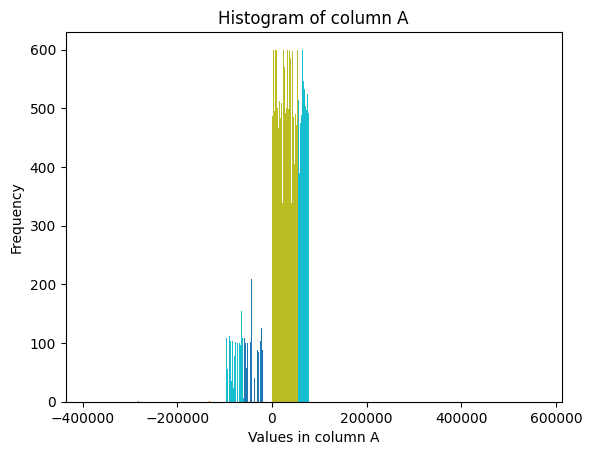

time: 55 s (started: 2023-04-15 18:48:18 +00:00)


In [20]:
# plot a histogram of column A
plt.hist(X_train_downsampled['A'])
plt.xlabel('Values in column A')
plt.ylabel('Frequency')
plt.title('Histogram of column A')
plt.show()

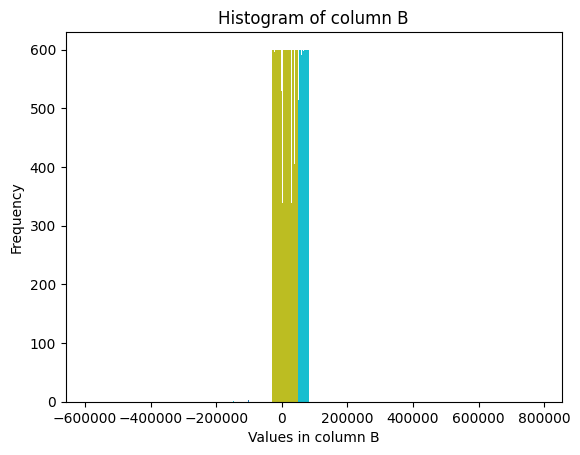

time: 53.3 s (started: 2023-04-15 18:49:13 +00:00)


In [21]:
# plot a histogram of column B
plt.hist(X_train_downsampled['B'])
plt.xlabel('Values in column B')
plt.ylabel('Frequency')
plt.title('Histogram of column B')
plt.show()

-4.331474285190386


(array([7.000e+00, 2.600e+01, 1.290e+02, 3.820e+02, 2.363e+03, 7.030e+02,
        3.320e+02, 8.700e+01, 2.000e+01, 1.000e+00]),
 array([-1289.84166667, -1027.38533333,  -764.929     ,  -502.47266667,
         -240.01633333,    22.44      ,   284.89633333,   547.35266667,
          809.809     ,  1072.26533333,  1334.72166667]),
 <BarContainer object of 10 artists>)

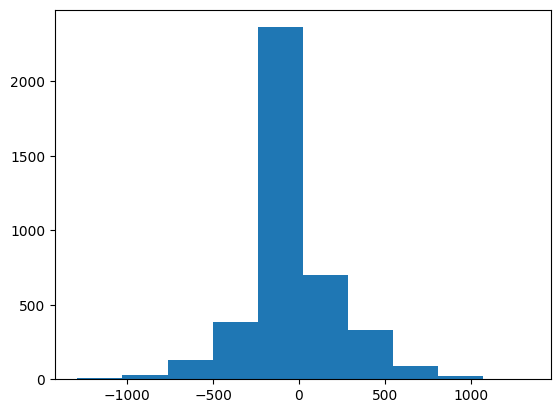

time: 257 ms (started: 2023-04-15 18:50:06 +00:00)


In [22]:
print(X_train_downsampled['A'].apply(np.mean).mean())
plt.hist(X_train_downsampled['A'].apply(np.mean))

-4.322014830882335


(array([1.000e+00, 1.200e+01, 5.200e+01, 2.480e+02, 6.230e+02, 2.374e+03,
        4.880e+02, 2.000e+02, 4.700e+01, 5.000e+00]),
 array([-1418.22666667, -1155.81283333,  -893.399     ,  -630.98516667,
         -368.57133333,  -106.1575    ,   156.25633333,   418.67016667,
          681.084     ,   943.49783333,  1205.91166667]),
 <BarContainer object of 10 artists>)

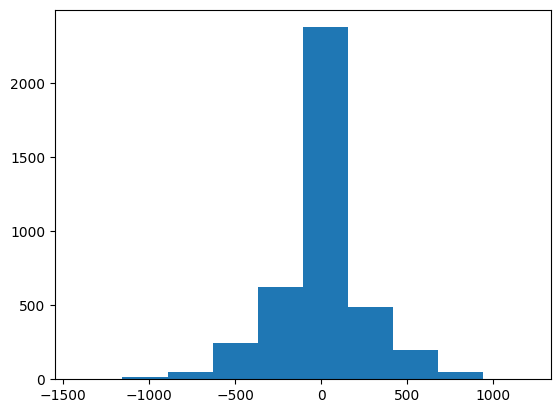

time: 270 ms (started: 2023-04-15 18:50:07 +00:00)


In [23]:
print(X_train_downsampled['B'].apply(np.mean).mean())
plt.hist(X_train_downsampled['B'].apply(np.mean))

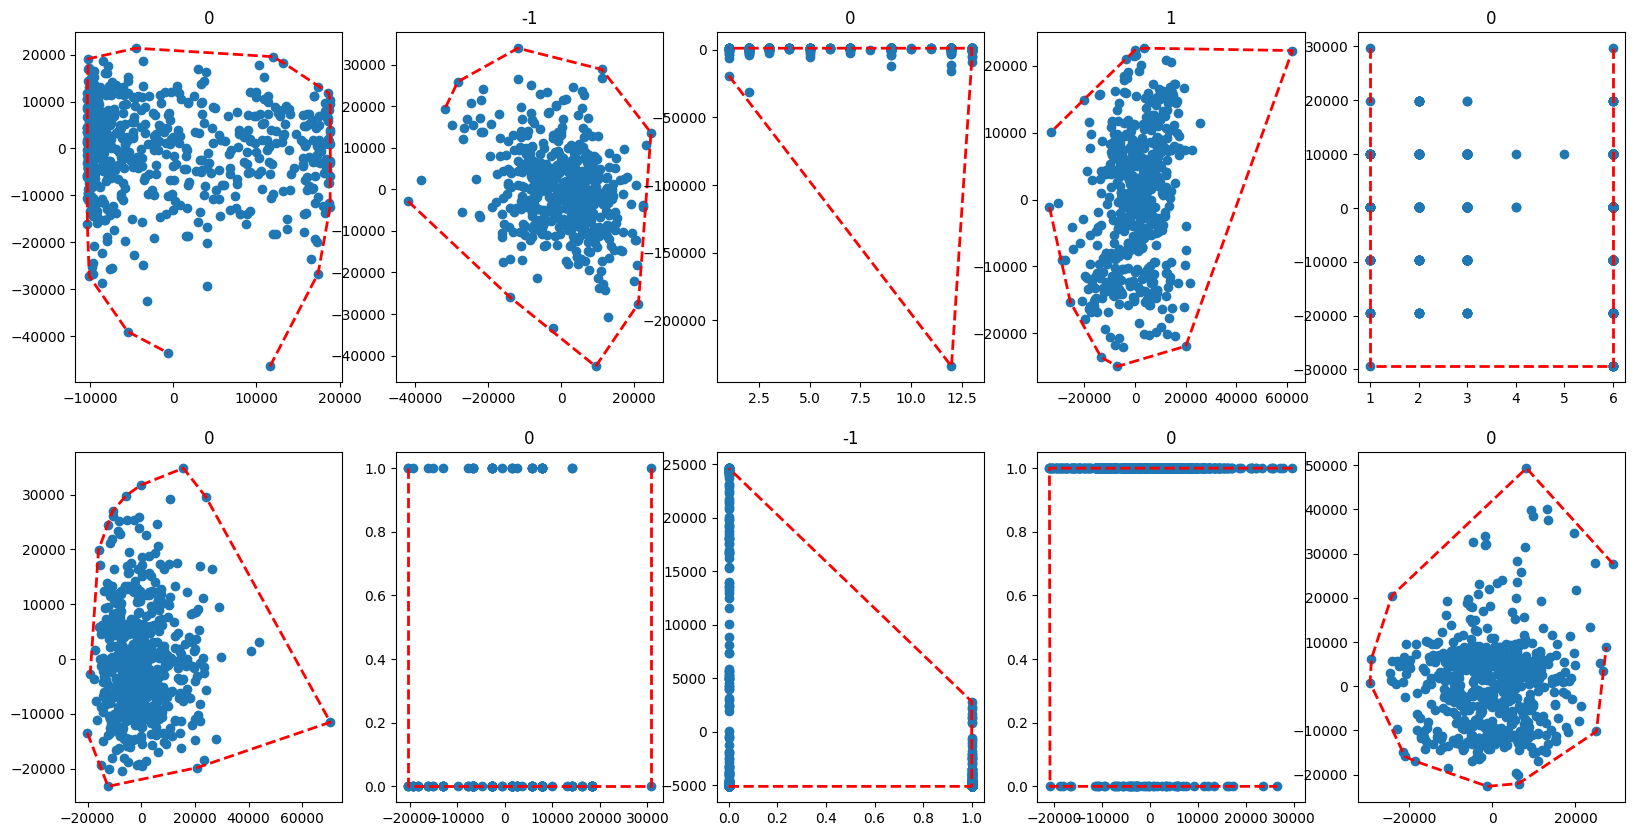

time: 1.47 s (started: 2023-04-15 18:50:07 +00:00)


In [24]:
from scipy.spatial import ConvexHull

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
    x = X_train_downsampled["A"][i+10]
    y = X_train_downsampled["B"][i+10]
    points = np.column_stack((x, y))
    hull = ConvexHull(points)
    axs[i // 5, i % 5].scatter(x, y)
    axs[i // 5, i % 5].plot(x[hull.vertices], y[hull.vertices], 'r--', lw=2)
    axs[i // 5, i % 5].set_title(y_train['Target'][i+10])
plt.show()

Let's compute the ANM on the downsampled set.

In [25]:
anm = ANM()

time: 397 µs (started: 2023-04-15 18:50:08 +00:00)


In [26]:
def anm_score_pair(row):
    a_to_b = anm.anm_score(row["A"].reshape(-1, 1), row["B"])
    b_to_a = anm.anm_score(row["B"].reshape(-1, 1), row["A"])
    return b_to_a - a_to_b

time: 534 µs (started: 2023-04-15 18:50:08 +00:00)


In [27]:
# apply score_pair to each row of the dataframe
res = X_train_downsampled.progress_apply(anm_score_pair, axis=1)

  0%|          | 0/4050 [00:00<?, ?it/s]

invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
overflow encountered in exp
invalid value encountered in reduce
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
overflow encountered in exp
invalid value encountered in reduce
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
overflow encountered in exp
invalid value encountered in reduce
invalid value encountered in true_divide
Mean of empty slic

time: 11min 22s (started: 2023-04-15 18:50:08 +00:00)


In [28]:
res

SampleID
train1       -0.132172
train2       -0.087044
train3        1.728737
train4        0.029165
train5      -16.961888
               ...    
train4046    -0.009391
train4047    -0.090747
train4048    -0.000064
train4049     0.264194
train4050     0.277379
Length: 4050, dtype: float64

time: 6.79 ms (started: 2023-04-15 19:01:31 +00:00)


In [29]:
(res.values>0).sum()

2005

time: 9.32 ms (started: 2023-04-15 19:01:31 +00:00)


In [30]:
(res.values<0).sum()

2037

time: 13.2 ms (started: 2023-04-15 19:01:31 +00:00)


In [31]:
(res.values==0).sum() # samples with no additive noise

8

time: 4.62 ms (started: 2023-04-15 19:01:31 +00:00)


Computing the CDS score

In [32]:
cds = CDS()

time: 366 µs (started: 2023-04-15 19:01:31 +00:00)


In [33]:
def cds_score_pair(row):
    a_to_b = cds.cds_score(row["A"].reshape(-1, 1), row["B"])
    b_to_a = cds.cds_score(row["B"].reshape(-1, 1), row["A"])
    return b_to_a - a_to_b

time: 1.54 ms (started: 2023-04-15 19:01:31 +00:00)


In [34]:
cds_res = X_train_downsampled.progress_apply(cds_score_pair, axis=1)

  0%|          | 0/4050 [00:00<?, ?it/s]

time: 3min 23s (started: 2023-04-15 19:01:31 +00:00)


In [35]:
cds_res

SampleID
train1      -0.000987
train2      -0.012657
train3       0.037757
train4       0.012153
train5       0.094654
               ...   
train4046    0.003788
train4047   -0.016653
train4048    0.000169
train4049    0.007474
train4050    0.003471
Length: 4050, dtype: float64

time: 8.25 ms (started: 2023-04-15 19:04:55 +00:00)


### Create new features

- Pearson correlation coefficient: measures the linear relationship between two variables.
- Mean of the two lists: can provide information on the central tendency of each list.
- Standard deviation of the two lists: can provide information on the variability of each list.
- Skewness and kurtosis of the two lists: can provide information on the shape of the distributions of each list.
- Granger causality: measures the causal relationship between two time series variables by examining whether past values of one variable help predict the future values of the other variable


In [36]:
df = pd.DataFrame(data=res, columns =['ANM']).rename_axis('SampleID')
df

,ANM
SampleID,
train1,-0.132172
train2,-0.087044
train3,1.728737
train4,0.029165
train5,-16.961888
...,...
train4046,-0.009391
train4047,-0.090747
train4048,-0.000064


time: 10.1 ms (started: 2023-04-15 19:04:55 +00:00)


In [37]:
df['CDS'] = cds_res
df.head(2)

,ANM,CDS
SampleID,,
train1,-0.132172,-0.000987
train2,-0.087044,-0.012657


time: 10 ms (started: 2023-04-15 19:04:55 +00:00)


In [38]:
df['Mean_A'] = X_train_downsampled['A'].apply(np.mean)
df['Mean_B'] = X_train_downsampled['B'].apply(np.mean)
df.head(2)

,ANM,CDS,Mean_A,Mean_B
SampleID,,,,
train1,-0.132172,-0.000987,-0.005199,5.499133
train2,-0.087044,-0.012657,-117.481667,4.058333


time: 82.5 ms (started: 2023-04-15 19:04:55 +00:00)


In [39]:
df['Std_A'] = X_train_downsampled['A'].apply(np.std)
df['Std_B'] = X_train_downsampled['B'].apply(np.std)
df.head(2)

,ANM,CDS,Mean_A,Mean_B,Std_A,Std_B
SampleID,,,,,,
train1,-0.132172,-0.000987,-0.005199,5.499133,9991.334990,2.291666
train2,-0.087044,-0.012657,-117.481667,4.058333,9720.910436,1.502752


time: 344 ms (started: 2023-04-15 19:04:55 +00:00)


In [40]:
from scipy.stats import pearsonr, skew, kurtosis

time: 390 µs (started: 2023-04-15 19:04:56 +00:00)


In [41]:
def pearson_corr(x):
    if np.var(x['A']) == 0 or np.var(x['B']) == 0:
        return 0
    return pearsonr(x['A'], x['B'])[0]

df['correlation'] = X_train_downsampled.apply(pearson_corr, axis=1)
df.head(2)

,ANM,CDS,Mean_A,Mean_B,Std_A,Std_B,correlation
SampleID,,,,,,,
train1,-0.132172,-0.000987,-0.005199,5.499133,9991.334990,2.291666,0.014696
train2,-0.087044,-0.012657,-117.481667,4.058333,9720.910436,1.502752,-0.129218


time: 4.89 s (started: 2023-04-15 19:04:56 +00:00)


In [42]:
df['skewness_A'] = X_train_downsampled['A'].apply(skew)
df['skewness_B'] = X_train_downsampled['B'].apply(skew)

df['kurtosis_A'] = X_train_downsampled['A'].apply(kurtosis)
df['kurtosis_B'] = X_train_downsampled['B'].apply(kurtosis)

df.head(2)

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


,ANM,CDS,Mean_A,Mean_B,Std_A,Std_B,correlation,skewness_A,skewness_B,kurtosis_A,kurtosis_B
SampleID,,,,,,,,,,,
train1,-0.132172,-0.000987,-0.005199,5.499133,9991.334990,2.291666,0.014696,0.112447,-1.111304,-0.524831,-0.484470
train2,-0.087044,-0.012657,-117.481667,4.058333,9720.910436,1.502752,-0.129218,0.168169,-0.989230,0.059602,0.325427


time: 8.58 s (started: 2023-04-15 19:05:01 +00:00)


In [43]:
df.isna().sum()

ANM            0
CDS            0
Mean_A         0
Mean_B         0
Std_A          0
Std_B          0
correlation    0
skewness_A     5
skewness_B     1
kurtosis_A     5
kurtosis_B     1
dtype: int64

time: 4.72 ms (started: 2023-04-15 19:05:09 +00:00)


In [44]:
df.fillna(0, inplace=True)
df.isna().sum()

ANM            0
CDS            0
Mean_A         0
Mean_B         0
Std_A          0
Std_B          0
correlation    0
skewness_A     0
skewness_B     0
kurtosis_A     0
kurtosis_B     0
dtype: int64

time: 8.89 ms (started: 2023-04-15 19:05:09 +00:00)


#### Preparing the valid set

In [45]:
res_valid = X_valid_downsampled.progress_apply(anm_score_pair, axis=1)

  0%|          | 0/4050 [00:00<?, ?it/s]

invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
overflow encountered in exp
invalid value encountered in reduce
overflow encountered in exp
invalid value encountered in reduce
overflow encountered in exp
invalid value encountered in reduce
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
overflow encountered in exp
invalid value encountered in reduce
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empt

time: 11min 29s (started: 2023-04-15 19:05:09 +00:00)


In [46]:
cds_res_valid = X_valid_downsampled.progress_apply(cds_score_pair, axis=1)

  0%|          | 0/4050 [00:00<?, ?it/s]

time: 3min 27s (started: 2023-04-15 19:16:39 +00:00)


In [47]:
df_valid = pd.DataFrame(data=res_valid, columns =['ANM']).rename_axis('SampleID')
df_valid['CDS'] = cds_res_valid

df_valid['Mean_A'] = X_valid_downsampled['A'].apply(np.mean)
df_valid['Mean_B'] = X_valid_downsampled['B'].apply(np.mean)

df_valid['Std_A'] = X_valid_downsampled['A'].apply(np.std)
df_valid['Std_B'] = X_valid_downsampled['B'].apply(np.std)

df_valid['correlation'] = X_valid_downsampled.apply(pearson_corr, axis=1)

df_valid['skewness_A'] = X_valid_downsampled['A'].apply(skew)
df_valid['skewness_B'] = X_valid_downsampled['B'].apply(skew)

df_valid['kurtosis_A'] = X_valid_downsampled['A'].apply(kurtosis)
df_valid['kurtosis_B'] = X_valid_downsampled['B'].apply(kurtosis)

df_valid.head(2)


Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


,ANM,CDS,Mean_A,Mean_B,Std_A,Std_B,correlation,skewness_A,skewness_B,kurtosis_A,kurtosis_B
SampleID,,,,,,,,,,,
valid1,0.263518,0.045922,-0.018868,-0.013208,9990.556543,9990.563677,0.249900,-0.399642,-0.869263,-0.376759,3.349413
valid2,0.005420,-0.012272,245.710000,-268.233333,9892.292057,10210.426456,-0.174548,0.787767,-0.458725,0.117173,-0.302251


time: 14.1 s (started: 2023-04-15 19:20:06 +00:00)


In [48]:
df_valid.isna().sum()

ANM            0
CDS            0
Mean_A         0
Mean_B         0
Std_A          0
Std_B          0
correlation    0
skewness_A     1
skewness_B     2
kurtosis_A     1
kurtosis_B     2
dtype: int64

time: 9.78 ms (started: 2023-04-15 19:20:20 +00:00)


In [49]:
df_valid.fillna(0, inplace=True)
df_valid.isna().sum()

ANM            0
CDS            0
Mean_A         0
Mean_B         0
Std_A          0
Std_B          0
correlation    0
skewness_A     0
skewness_B     0
kurtosis_A     0
kurtosis_B     0
dtype: int64

time: 6.4 ms (started: 2023-04-15 19:20:20 +00:00)


In [50]:
df.head()

,ANM,CDS,Mean_A,Mean_B,Std_A,Std_B,correlation,skewness_A,skewness_B,kurtosis_A,kurtosis_B
SampleID,,,,,,,,,,,
train1,-0.132172,-0.000987,-0.005199,5.499133,9991.334990,2.291666,0.014696,0.112447,-1.111304,-0.524831,-0.484470
train2,-0.087044,-0.012657,-117.481667,4.058333,9720.910436,1.502752,-0.129218,0.168169,-0.989230,0.059602,0.325427
train3,1.728737,0.037757,585.358333,-606.518333,10449.438928,10326.731064,-0.123667,1.243465,3.869757,0.772375,33.265188
train4,0.029165,0.012153,-84.588333,-201.361667,9961.964512,9414.142456,0.247447,-1.379769,0.545249,10.780858,0.668613
train5,-16.961888,0.094654,0.625000,0.966667,0.484123,0.179505,0.143839,-0.516398,-5.199469,-1.733333,25.034483


time: 18.5 ms (started: 2023-04-15 19:20:20 +00:00)


In [51]:
df_valid.head()

,ANM,CDS,Mean_A,Mean_B,Std_A,Std_B,correlation,skewness_A,skewness_B,kurtosis_A,kurtosis_B
SampleID,,,,,,,,,,,
valid1,0.263518,0.045922,-0.018868,-0.013208,9990.556543,9990.563677,0.249900,-0.399642,-0.869263,-0.376759,3.349413
valid2,0.005420,-0.012272,245.710000,-268.233333,9892.292057,10210.426456,-0.174548,0.787767,-0.458725,0.117173,-0.302251
valid3,0.050368,-0.022065,2.961667,0.691667,0.660957,0.461805,-0.011421,-0.478056,-0.830076,0.737561,-1.310974
valid4,0.000185,-0.000058,0.525316,0.500000,0.499359,0.500000,0.063372,-0.101396,0.000000,-1.989719,-2.000000
valid5,-0.946390,0.038129,-255.716667,7.758333,9725.699070,4.188866,0.151125,1.068878,-0.464301,0.084444,-0.966422


time: 14.7 ms (started: 2023-04-15 19:20:20 +00:00)


In [52]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
df_scaled = scale.fit_transform(df) 
df_valid_scaled = scale.transform(df_valid)

time: 7.88 ms (started: 2023-04-15 19:20:20 +00:00)


### Building the model

In [53]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(df_scaled, y_train)
print(X_tr.shape, X_te.shape)

(3037, 11) (1013, 11)
time: 3.01 ms (started: 2023-04-15 19:20:20 +00:00)


In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_tr, y_tr)
lr_score = lr.score(X_te, y_te)
lr_score

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.49555774925962487

time: 78.1 ms (started: 2023-04-15 19:20:20 +00:00)


In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_tr, y_tr)
dt_score = dt.score(X_te, y_te)
dt_score

0.5113524185587365

time: 46 ms (started: 2023-04-15 19:20:20 +00:00)


In [56]:
from sklearn.svm import SVC

svm = SVC(kernel='poly', degree=3, C=1)
svm.fit(X_tr, y_tr)
svm_score = svm.score(X_te, y_te)
svm_score

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.5735439289239882

time: 533 ms (started: 2023-04-15 19:20:21 +00:00)


### Saving the predictions

In [57]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(df_scaled, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(multi_class='multinomial')

time: 88.9 ms (started: 2023-04-15 19:20:21 +00:00)


In [58]:
dt = DecisionTreeClassifier()
dt.fit(df_scaled, y_train)

DecisionTreeClassifier()

time: 65.8 ms (started: 2023-04-15 19:20:21 +00:00)


In [59]:
svm = SVC(kernel='poly', degree=3, C=1)
svm.fit(df_scaled, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


SVC(C=1, kernel='poly')

time: 812 ms (started: 2023-04-15 19:20:21 +00:00)


In [60]:
predictions_lr = lr.predict(df_valid_scaled)

time: 1.19 ms (started: 2023-04-15 19:20:22 +00:00)


In [61]:
predictions_dt = dt.predict(df_valid_scaled)

time: 1.98 ms (started: 2023-04-15 19:20:22 +00:00)


In [62]:
predictions_svm = svm.predict(df_valid_scaled)

time: 326 ms (started: 2023-04-15 19:20:22 +00:00)


In [63]:
results_lr = pd.DataFrame(data=X_valid.index,columns = ['SampleID'])
results_lr['Target'] = predictions_lr

results_dt = pd.DataFrame(data=X_valid.index,columns = ['SampleID'])
results_dt['Target'] = predictions_dt

results_svm = pd.DataFrame(data=X_valid.index,columns = ['SampleID'])
results_svm['Target'] = predictions_svm

time: 9.76 ms (started: 2023-04-15 19:20:22 +00:00)


In [64]:
from pathlib import Path
from datetime import datetime

DATA = Path("public_data")
assert DATA.is_dir()

PRED_PATH = Path("Submissions")

PRED_PATH.mkdir(parents=True, exist_ok=True)

pred_fname = "results.csv"
compr_opts = dict(method="zip", archive_name=pred_fname)

results_lr.to_csv(PRED_PATH / f"results_logistic_regression.zip", compression=compr_opts, index=False, header=['SampleID', 'Target'])
results_dt.to_csv(PRED_PATH / f"results_decision_tree.zip", compression=compr_opts, index=False, header=['SampleID', 'Target'])
results_svm.to_csv(PRED_PATH / f"results_svm.zip", compression=compr_opts, index=False, header=['SampleID', 'Target'])


time: 25.7 ms (started: 2023-04-15 19:20:22 +00:00)


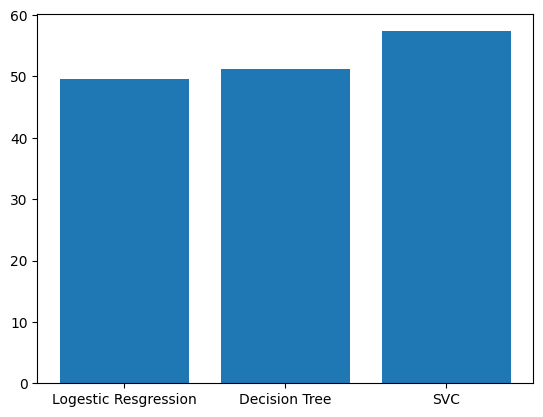

time: 131 ms (started: 2023-04-15 19:20:22 +00:00)


In [65]:
plt.bar(['Logestic Resgression', 'Decision Tree', 'SVC'], [lr_score*100, dt_score*100, svm_score*100])

plt.show()

NCC and Jarfo approaches

In [66]:
from cdt.causality.pairwise import NCC
import networkx as nx

obj = NCC()
obj.fit(X_train_downsampled, y_train)
output = obj.predict(X_valid_downsampled)

100%|█████████▉| 4049/4050 [00:01<00:00, 2667.44it/s]


time: 2min 44s (started: 2023-04-15 19:20:23 +00:00)


In [67]:
# from cdt.causality.pairwise import Jarfo
# import networkx as nx

# obj = Jarfo()
# obj.fit(X_train_downsampled, y_train)
# output = obj.predict(X_valid_downsampled)

time: 337 µs (started: 2023-04-15 19:23:07 +00:00)


In [68]:
results_NCC = pd.DataFrame(data=X_valid.index,columns = ['SampleID'])
results_NCC['Target'] = output
results_NCC

,SampleID,Target
0,valid1,-1.148577
1,valid2,-1.137624
2,valid3,-1.148577
3,valid4,-1.148577
4,valid5,-1.148577
...,...,...
4045,valid4046,-0.797253
4046,valid4047,-0.943006
4047,valid4048,-1.148577
4048,valid4049,-0.831622


time: 10.1 ms (started: 2023-04-15 19:23:07 +00:00)


In [69]:
from pathlib import Path
from datetime import datetime

DATA = Path("public_data")
assert DATA.is_dir()

PRED_PATH = Path("Submissions")

PRED_PATH.mkdir(parents=True, exist_ok=True)

submission_fp = PRED_PATH / f"results_NCC.zip"

pred_fname = "results.csv"
compr_opts = dict(method="zip", archive_name=pred_fname)

results_NCC.to_csv(submission_fp, compression=compr_opts, index=False, header=['SampleID', 'Target'])

print(f"The submission is ready: {submission_fp}")

The submission is ready: Submissions/results_NCC.zip
time: 19.4 ms (started: 2023-04-15 19:23:07 +00:00)


time: 25.2 ms (started: 2023-04-15 19:23:07 +00:00)
